# Analys av Iris datasetet med TensorFlow
## Multi Layered Perceptron Classifier (MLPClassifier)
### Mål:
- Repetera Machine Learning: TensorFlow, plottning med Seaborn, Pandas etc
- Kolla om vi kan ***klassificera*** species i iris datasetet med hjälp av neuralt nätverk i TensorFlow.
- Det här är ett ***"Multi-Class Classification"*** problem, eftersom det finns tre olika species av Iris.
<br>
### Steg för steg:
- Läser in datasetet från Seaborn. OBS, samma dataset kan även importeras från SciKit-Learn, men då är X, y redan separerade (X=iris.data, y=iris.target)
- Läser in nödvändiga delar från sklearn:  
`from sklearn.model_selection import train_test_split`  
`from sklearn.metrics import accuracy_score, classification_report`  
`from sklearn.metrics import confusion_matrix`  
`from sklearn.neural_network import MLPClassifier`  
- Definierar X (oberoende variabler, features) och y (beroende variabel, target). Byter ut namnet på iris till 0, 1 eller 2 manuellt.  
`iris['species'] = iris['species'].replace({'setosa': 0, 'versicolor': 1, 'virginica': 2})`
- Definierar ett model-object:  
`mlp_clf = MLPClassifier(hidden_layer_sizes=(5,), activation='relu', max_iter=1000, random_state=42)`
- Tränar modellen med .fit  
`model.fit(X_train, y_train)`
- Använder den tränade modellen för att prediktera y_pred:  
`y_pred = model.predict(X_test)`
- Evaluerar modellen:  
`print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")`  
`print("Classification Report:")`  
`print(classification_report(y_test, y_pred))`  
- Visualiserar en Confusion Matrix med Seaborn
- Visualiserar nätverket med en funktion som ChatGPT skrev till mig...
## Noteringar / Lessons Learned
- Den förstår själv att den ska ha 4 inputs och 3 outputs. Man definierar bara hur många neurons man vill ha per hidden layer.
## Länkar:
- 

In [77]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
import sklearn as sk
import tensorflow as tf
import keras
from keras import layers
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.utils import plot_model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix
from seaborn import load_dataset
import numpy as np
#sn.get_dataset_names() # list of available datasets

In [43]:
from sklearn.datasets import load_iris
iris = load_iris()
print(iris.data[0:5])
print(iris.target[0:5])

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
[0 0 0 0 0]


In [65]:
X = iris.data  # Features: Sepal and petal measurements
y = iris.target.reshape(-1, 1)  # Labels (0, 1, 2 representing the species)
print(y[0:5])
encoder = OneHotEncoder(sparse_output=False)
y_encoded = encoder.fit_transform(y)
print(y_encoded[0:5])

[[0]
 [0]
 [0]
 [0]
 [0]]
[[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]]


In [78]:
iris = load_dataset('iris') # load iris dataset as a pandas dataframe
# Define X and y
y_onehot = pd.get_dummies(iris['species'], dtype=int) # one-hot encode the target variable
X = iris.drop(columns=['species'])

# Perform train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y_onehot, test_size=0.2, random_state=42)

# convert y_train to 1D (numpy) array to avoid warning
if not isinstance(y_train, np.ndarray):
    y_train = y_train.values.ravel()
    y_train = y_train.astype(int) # make sure y_train is of type int

# convert y_test to 1D (numpy) array to avoid warning
if not isinstance(y_test, np.ndarray):
	y_test = y_test.values.ravel()
	y_test = y_test.astype(int) # make sure y_test is of type int
      
# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [93]:
iris = load_dataset('iris') # load iris dataset as a pandas dataframe

pd.set_option('future.no_silent_downcasting', True) # to avoid warning on deprecated 'replace' method
iris['species'] = iris['species'].replace({'setosa': 0, 'versicolor': 1, 'virginica': 2})

# Define X and y
#y = pd.get_dummies(iris['species'], dtype=int) # one-hot encode the target variable
X = iris.drop(columns=['species'])
y = iris['species']

# Perform train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

y_train_onehot = pd.get_dummies(y_train, dtype=int) # one-hot encode the target variable
y_test_onehot = pd.get_dummies(y_test, dtype=int) # one-hot encode the target variable

# convert y_train to 1D (numpy) array to avoid warning
if not isinstance(y_train_onehot, np.ndarray):
    y_train_onehot = y_train_onehot.values.ravel()
    y_train_onehot = y_train_onehot.astype(int) # make sure y_train is of type int

# convert y_test to 1D (numpy) array to avoid warning
if not isinstance(y_test_onehot, np.ndarray):
	y_test_onehot = y_test_onehot.values.ravel()
	y_test_onehot = y_test_onehot.astype(int) # make sure y_test is of type int
      
# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [94]:
y_test_onehot

array([0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1,
       0, 0])

In [79]:
model = keras.Sequential([layers.InputLayer(shape=(X.shape[1],), name='input'),
                          layers.Dense(10, activation='relu', name='hidden1'),
                          layers.Dense(5, activation='relu', name='hidden2'),
                          layers.Dense(3, activation='softmax', name='output')],
                          name='iris_model')
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "iris_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ hidden1 (Dense)                 │ (None, 10)             │            50 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden2 (Dense)                 │ (None, 5)              │            55 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 3)              │            18 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 123 (492.00 B)

 Trainable params: 123 (492.00 B)

 Non-trainable params: 0 (0.00 B)

In [80]:
hisory = model.fit(X_train, y_train, epochs=10, batch_size=10, verbose=0)

ValueError: Data cardinality is ambiguous. Make sure all arrays contain the same number of samples.'x' sizes: 120
'y' sizes: 360


<Axes: xlabel='epochs', ylabel='loss/accuracy'>

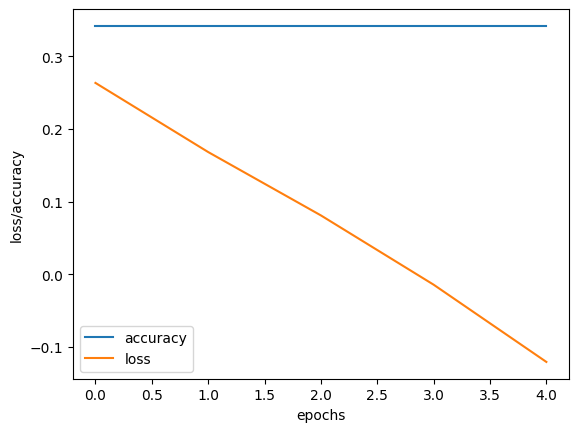

In [24]:
pd.DataFrame(model.history.history).plot(xlabel='epochs',ylabel='loss/accuracy')

In [25]:
# Evaluate the model
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
print("Classification Report:")
print(classification_report(y_test, y_pred))

NameError: name 'y_pred' is not defined